In [7]:
#  lambda function
import pandas as pd
df=pd.DataFrame({
    'id':[1,2,3,4,5],
    'name':['Jeremy','Frank','Janet','Ryan','Mary'],
    'age':[20,25,15,10,30],
    'income':[4000,7000,200,0,10000]
})
df


,id,name,age,income
0,1,Jeremy,20,4000
1,2,Frank,25,7000
2,3,Janet,15,200
3,4,Ryan,10,0
4,5,Mary,30,10000


In [9]:
# Adding  3  years to each column 
df['age']=df['age'].apply(lambda x: x+3)
df

,id,name,age,income
0,1,Jeremy,29,4000
1,2,Frank,34,7000
2,3,Janet,24,200
3,4,Ryan,19,0
4,5,Mary,39,10000


In [10]:
#Lambda with Filter
# how many people are above the  age of 18 years
list(filter(lambda x: x>18,df['age']))

[29, 34, 24, 19, 39]

In [12]:
# lambda  with map
# usrful when we want  to replace values with other values
df['income']= list(map(lambda x:int(x+x*0.2),df['income']))
df

,id,name,age,income
0,1,Jeremy,29,5760
1,2,Frank,34,10080
2,3,Janet,24,288
3,4,Ryan,19,0
4,5,Mary,39,14400


In [14]:
df['category']=df['age'].apply(lambda x: 'Adult' if x>= 18 else 'child')
df

,id,name,age,income,category
0,1,Jeremy,29,5760,Adult
1,2,Frank,34,10080,Adult
2,3,Janet,24,288,Adult
3,4,Ryan,19,0,Adult
4,5,Mary,39,14400,Adult


In [2]:
#  PLOTTING
import seaborn as sns
sns.get_dataset_names()



URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='Probability'>

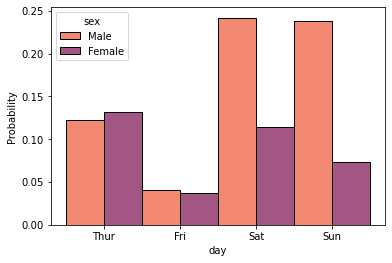

In [21]:
sns.histplot(tips,x='day',hue='sex',stat='probability',multiple='dodge',palette="rocket_r")

<AxesSubplot:xlabel='day', ylabel='Probability'>

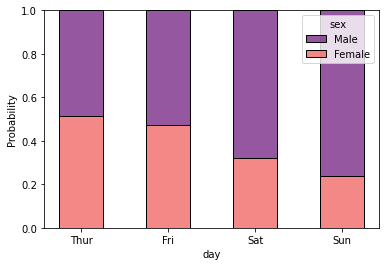

In [24]:
sns.histplot(tips,x='day',hue='sex',stat='probability',multiple='fill',shrink=.5,palette='magma')
# stat can only be ['count', 'density', 'probability', 'frequency']

NameError: name 'sns' is not defined

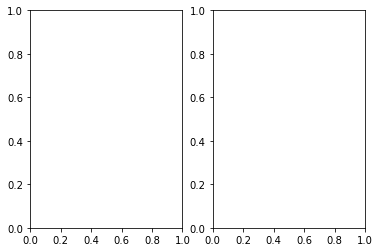

In [1]:
from matplotlib import pyplot as plt
x,y,hue="day","prop",'sex'
hue_order =['male','female']

f,axes = plt.subplots(1,2)
sns.countplot(x=x,hue=hue,data=tips,ax=axes[0])

prop_df=(tips[x].groupby(tips[hue]).value_counts(normalize=True).rename(y).reset_index())
sns.barplot(x=x,y=y,hue=hue,data=prop_df,ax=axes[1])

<ipython-input-1-c1666c590274>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


[Text(0, -5.0, '-500.00%'),
 Text(0, -4.0, '-400.00%'),
 Text(0, -3.0, '-300.00%'),
 Text(0, -2.0, '-200.00%'),
 Text(0, -1.0, '-100.00%'),
 Text(0, 0.0, '0.00%'),
 Text(0, 1.0, '100.00%'),
 Text(0, 2.0, '200.00%'),
 Text(0, 3.0, '300.00%'),
 Text(0, 4.0, '400.00%')]

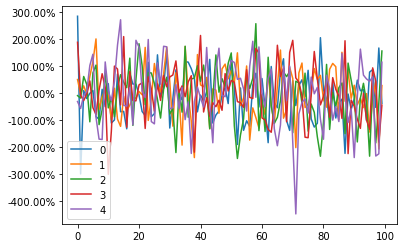

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
df=pd.DataFrame(np.random.randn(100,5))

ax=df.plot()
type(ax)
vals=ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

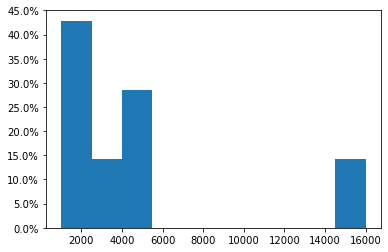

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
data=[1000,1000,5000,3000,4000,16000,2000]
plt.hist(data,weights=np.ones(len(data))/len(data))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

<ipython-input-12-f0c02bef39a8>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['%1.2f%%' %i for i  in vals])


[Text(0, 0.0, '-5.00%'),
 Text(0, 10.0, '-4.00%'),
 Text(0, 20.0, '-3.00%'),
 Text(0, 30.0, '-2.00%'),
 Text(0, 40.0, '-1.00%'),
 Text(0, 50.0, '0.00%'),
 Text(0, 60.0, '1.00%')]

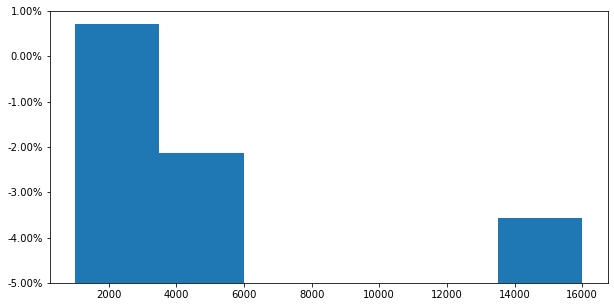

In [12]:
f,ax=plt.subplots(1,1,figsize=(10,5))
data=[1000,1000,5000,3000,4000,16000,2000]
heights,bins=np.histogram(data,bins=len(list(set(data))))
percent =[i/sum(heights)*100 for i in  heights]
ax.bar(bins[:-1],percent,width=2500,align='edge')
ax.set_yticklabels(['%1.2f%%' %i for i  in vals])

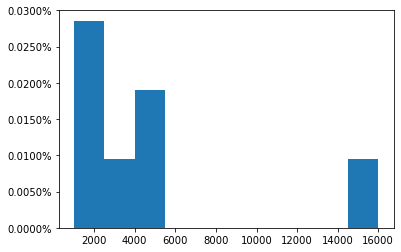

In [13]:
data=[1000,1000,5000,3000,4000,16000,2000]
plt.hist(data,density=True)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

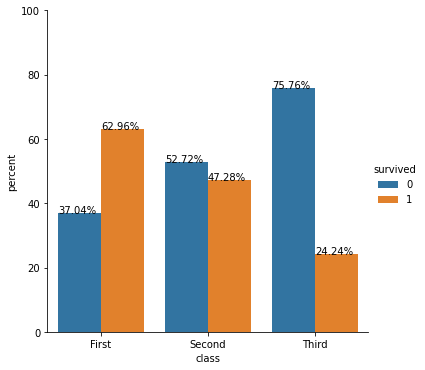

In [36]:
df = sns.load_dataset('titanic')
df.head()

x,y = 'class', 'survived'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100) #  mul used to get multiplication of an  elementt by anpther,element wise
df1 = df1.rename('percent').reset_index()
df1
g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [22]:
s=pd.Series([3,1,2,3,4,np.nan])
s
s.value_counts(normalize=True)

3.0    0.4
2.0    0.2
4.0    0.2
1.0    0.2
dtype: float64

In [29]:
# panda reset index
dff = pd.DataFrame([('bird',389.0),
                   ('bird',24.0),
                   ('mammal',80.5),
                   ('mammal',np.nan)],
                  index=['falcon', 'parrot', 'lion', 'monkey'],
                  columns=('class', 'max_speed'))
dff

,class,max_speed
falcon,bird,389.0
parrot,bird,24.0
lion,mammal,80.5
monkey,mammal,NaN


In [30]:
# reseting the data frame gives
dff.reset_index()

,index,class,max_speed
0,falcon,bird,389.0
1,parrot,bird,24.0
2,lion,mammal,80.5
3,monkey,mammal,NaN


In [32]:
#  use the drop parameter to avoid the old index being added as a column:
dff.reset_index(drop=True)

,class,max_speed
0,bird,389.0
1,bird,24.0
2,mammal,80.5
3,mammal,NaN


In [33]:

    # making data frame from csv file
data = pd.read_csv("C:/Users/adm/AppData/Local/Temp/employees.csv")
   
# setting first name as index column
data.set_index(["First Name"], inplace = True,
                    append = True, drop = True)
   
# resetting index
data.reset_index(inplace = True)
   
# display
data.head()

,level_0,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [34]:
data.set_index(["First Name", "Gender"], inplace = True,
                             append = True, drop = True)
   
# resetting index
data.reset_index(level = 2, inplace = True, col_level = 1)
   
# display
data.head()

,,Gender,level_0,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
,First Name,,,,,,,,
0,Douglas,Male,0,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,1,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,2,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,4,1/24/1998,4:47 PM,101004,1.389,True,Client Services


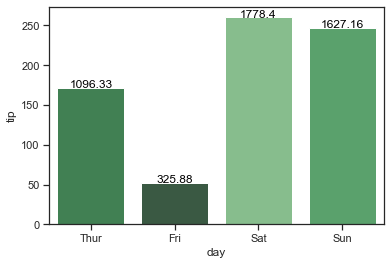

In [57]:
import seaborn as sns
import numpy as np
sns.set(style='ticks',color_codes=True)
import matplotlib.pyplot as plt
data=sns.load_dataset('tips')
grouped_values=data.groupby('day').sum().reset_index()
grouped_values
pal=sns.color_palette("Greens_d",len(grouped_values))
rank=grouped_values['total_bill'].argsort().argsort()
g=sns.barplot(x="day",y="tip",data=grouped_values,palette=np.array(pal[::-1])[rank])
for index,row in grouped_values.iterrows():
    g.text(row.name,row.tip,round(row.total_bill,2),color="black",ha="center")

NameError: name 'product' is not defined

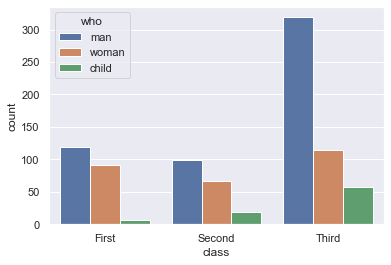

In [65]:
sns.set(style="darkgrid")
titanic=sns.load_dataset("titanic")
ax=sns.countplot(x="class",hue="who",data=titanic)
class_order=['first','second','third']
hue_order=['child','man','woman']
bar_order=product(class_order,hue_order)
catp=sns.catplot(x="class",hue="who",data=titanic,kind='count')

In [4]:
import pandas as pd
from  sklearn.impute import SimpleImputer 
import numpy as np
arr=[[1.,'x'],[np.nan,'y'],[7.,'y'],[4.,np.nan]]
df1=pd.DataFrame({'x1':[x[0]for i in arr],
                 'x2':[x[0]for i in arr]},
                index=[I for I in 'abcde'])
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")


NameError: name 'x' is not defined

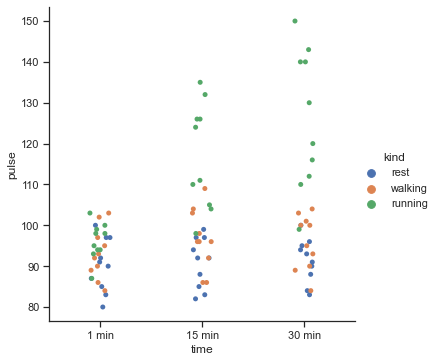

In [5]:
# SEA BORN CATPLOT IN FACET WRAPPING
import seaborn as sns
sns.set_theme(style = 'ticks')
exercise =  sns.load_dataset('exercise')

sns.catplot(x="time", y="pulse", hue="kind", data=exercise)

In [ ]:
g = sns.catplot(x="time", y="pulse", hue="kind",

                col="diet", data=exercise,

                height=5, aspect=.8)


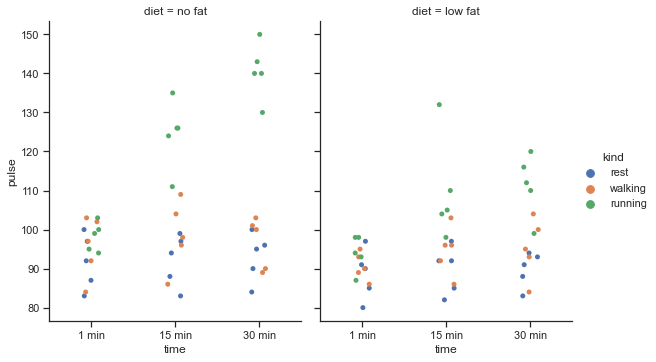

In [9]:
sns.catplot(x='time',y='pulse',hue='kind',col='diet',data=exercise,height = 5
           ,aspect = .8)

In [11]:
titanic =  sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


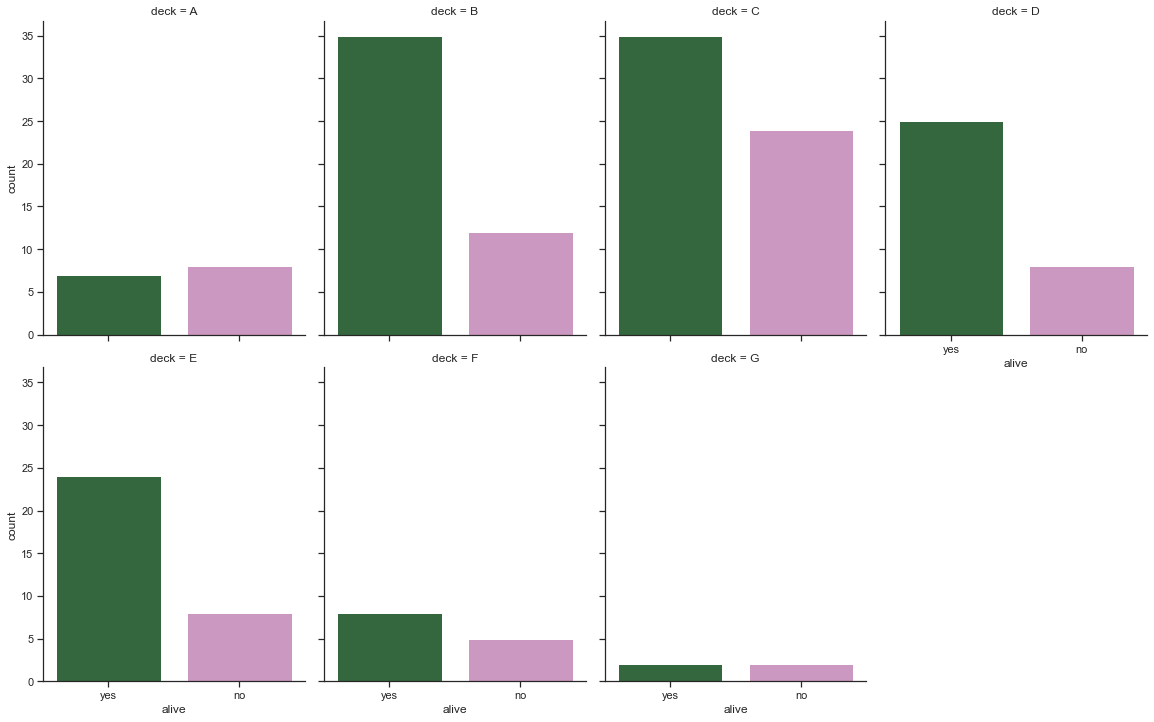

In [14]:
# row, col names of variables in data, optional. Categorical variables that will determine the faceting of the grid.
#col_wrapint “Wrap” the column variable at this width, so that the column facets span multiple rows. Incompatible with a row facet.

p = sns.catplot(x = 'alive', col = 'deck',col_wrap = 4,
               data = titanic[titanic.deck.notnull()],kind= 'count',aspect = .8,
               palette = 'cubehelix')

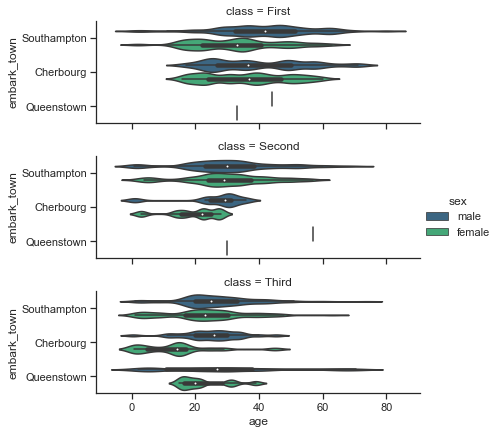

In [26]:
 h =  sns.catplot( x= 'age', y= 'embark_town',hue =  'sex', row = 'class',
                  data = titanic[titanic.embark_town.notnull()],height= 2, aspect =3,kind= 'violin',
                  palette = 'viridis',dodge = True ,bw = .2 ,orient = 'h')

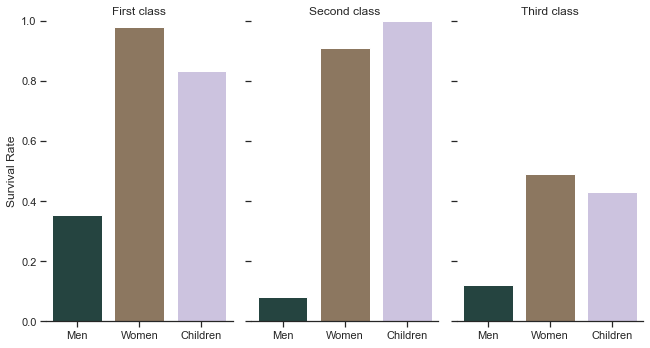

In [41]:
g = sns.catplot(x="who", y="survived", col="class",
                data=titanic, saturation=.5,
                kind="bar", ci=None, aspect=.6, palette= 'cubehelix')
(g.set_axis_labels("","Survival Rate")
  .set_xticklabels(["Men","Women","Children"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0,1))
  .despine(left=True))



In [43]:
import pandas as pd
housing =  pd.read_csv("C:/Users/adm/Documents/Datasets/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [55]:
tt = housing.iloc[:,0:8]
t = pd.melt(tt)
t.tail()

,variable,value
165115,median_income,1.5603
165116,median_income,2.5568
165117,median_income,1.7000
165118,median_income,1.8672
165119,median_income,2.3886


In [ ]:
sns.catplot(data = pd.melt(housing.iloc[:,0:8]),x= 'value',kind = 'bar',row='variable',height= 2, aspect =3 )

In [46]:
# Melting
df = pd.DataFrame({'Name': {0: 'John', 1: 'Bob', 2: 'Shiela'},
                   'Course': {0: 'Masters', 1: 'Graduate', 2: 'Graduate'},
                   'Age': {0: 27, 1: 23, 2: 21}})
pd.melt(df)

,variable,value
0,Name,John
1,Name,Bob
2,Name,Shiela
3,Course,Masters
4,Course,Graduate
5,Course,Graduate
6,Age,27
7,Age,23
8,Age,21


In [ ]:
# Name is id_vars and Course is value_vars
pd.melt(df, id_vars =['Name'], value_vars =['Course'])

In [53]:
pd.melt(df,id_vars = ['Name'], value_vars = ['Course'])

,Name,variable,value
0,John,Course,Masters
1,Bob,Course,Graduate
2,Shiela,Course,Graduate


In [1]:
$ python -m pip install beautifulsoa

SyntaxError: invalid syntax (<ipython-input-1-7a75b7b2ba67>, line 1)

In [2]:
python -m pip install beautifulsoap

SyntaxError: invalid syntax (<ipython-input-2-333e096c3326>, line 1)

In [ ]:
pd.melt(df,value_vars = ['Course'] )

In [1]:
pip install nbconvert[webpdf]